In [1]:
import pandas as pd
import numpy as np
import warnings
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta

from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

scaler = MinMaxScaler()
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# 1.0 Data retrival

In [2]:
df = pd.read_pickle('../0_dataset/df_prep.pkl')
df = df.set_index('Data')

In [3]:
df.head(2)

,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Settore Prevalente,Tempo Permanenza ( min ),Radiazione totale ( MJ/mq )
Data,,,,,,,,,,,,,,
1988-05-05,3.8,3.6,14.7,22.6,9.6,70.433480,97.291174,34.658084,1.366919,8.493583,167.706199,3.0,435.422915,16.751609
1988-05-06,0.0,0.2,17.5,27.0,8.1,54.394726,79.483470,19.902824,1.387578,7.981243,192.603491,5.0,363.094092,18.887784


In [4]:
df['Settore Prevalente'] = df['Settore Prevalente'].astype('str')

# 2.0 Model

# 2.1 Scaling

In [5]:
for i in df:
    if df[i].dtypes != 'object':
        df[i] = scaler.fit_transform(df[i].values.reshape(-1,1))

In [6]:
df = df.drop(columns=['Settore Prevalente'])

(array([1.0554e+04, 1.0570e+03, 3.2300e+02, 1.1200e+02, 3.7000e+01,
        2.0000e+01, 1.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

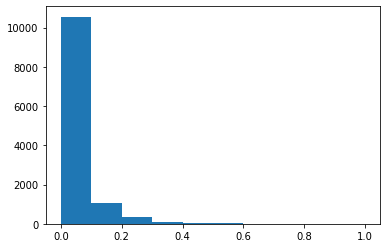

In [7]:
a,b,floc,scale = beta.fit(df['Precipitazione dalle 0 alle 0 ( mm )'])
t0 = beta.rvs(a, b, size=len(df['Precipitazione dalle 0 alle 0 ( mm )']))
df['Precipitazione dalle 0 alle 0 ( mm )'] = (t0-t0.min())/(t0.max()-t0.min())
plt.hist(df['Precipitazione dalle 0 alle 0 ( mm )'])

(array([1.028e+04, 1.213e+03, 3.600e+02, 1.490e+02, 5.100e+01, 3.700e+01,
        1.000e+01, 5.000e+00, 2.000e+00, 3.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

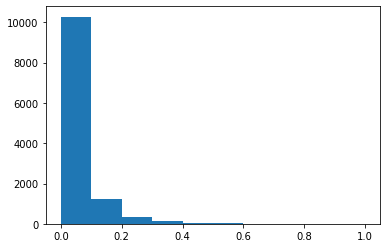

In [8]:
a,b,floc,scale = beta.fit(df['Precipitazione dalle 9 alle 9 ( mm )'])
t0 = beta.rvs(a, b, size=len(df['Precipitazione dalle 9 alle 9 ( mm )']))
df['Precipitazione dalle 9 alle 9 ( mm )'] = (t0-t0.min())/(t0.max()-t0.min())
plt.hist(df['Precipitazione dalle 9 alle 9 ( mm )'])

# 2.2 Clustering

In [9]:
# categorical = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
data = df.to_numpy()

In [10]:
# cost = []
# for cluster in range(2, 10):
#     print('Inzio con il cluster: ', cluster)
#     kprototype = KPrototypes(n_jobs = 1, n_clusters = cluster, init = 'Huang', random_state = 0)
#     kprototype.fit_predict(data, categorical = categorical)
#     cost.append(kprototype.cost_)
#     print('Finito il cluster: ', cluster)

In [11]:
cost = []
for cluster in range(2, 10):
    km = KMeans(n_clusters=cluster,init='random',random_state=0)
    km.fit_predict(data)
    cost.append(km.inertia_)
    print('Silhouette Score con ',cluster,'è pari a: ',silhouette_score(data,km.fit_predict(data)))
#     print(f' Silhouette Score(n=4): {silhouette_score(x_input,label)}')
#     print('Finito il cluster: ', cluster)

Silhouette Score con  2 è pari a:  0.3554639101682027
Silhouette Score con  3 è pari a:  0.3121790494074757
Silhouette Score con  4 è pari a:  0.2796227412897789
Silhouette Score con  5 è pari a:  0.2620341840635819
Silhouette Score con  6 è pari a:  0.25083870119082075
Silhouette Score con  7 è pari a:  0.22575718716242255
Silhouette Score con  8 è pari a:  0.20402437115696578
Silhouette Score con  9 è pari a:  0.20505105078419658


In [12]:
# pd.DataFrame(cost).pct_change()*100

In [13]:
# plt.plot(cost)

In [14]:
# model = KPrototypes(n_jobs = 1, n_clusters = 5, init = 'Cao', random_state = 0)

In [25]:
model = KMeans(n_clusters=3,init='random',random_state=0)

In [26]:
# df['cluster'] = model.fit_predict(df,categorical=categorical)

In [27]:
df['cluster'] = model.fit_predict(df)

In [28]:
df['cluster'].value_counts()

0    5152
1    4026
2    2932
Name: cluster, dtype: int64

In [29]:
df.groupby('cluster').median()

,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Tempo Permanenza ( min ),Radiazione totale ( MJ/mq )
cluster,,,,,,,,,,,,,
0,0.014898,0.009753,0.368421,0.393023,0.373984,0.66,0.93,0.30,0.136364,0.192459,0.069444,0.280303,0.271875
1,0.015454,0.010794,0.540166,0.474419,0.601626,0.88,0.99,0.64,0.090909,0.121495,0.194444,0.219697,0.190625
2,0.016538,0.010547,0.803324,0.760465,0.769648,0.65,0.92,0.36,0.139504,0.230530,0.090278,0.241196,0.734375


In [30]:
dft = df.reset_index()

In [31]:
# cl2 = df[df['cluster']==1]
# cl2 = cl2.reset_index()

In [32]:
# cl2.groupby(cl2['Data'].dt.year).mean()

In [63]:
# dft[(dft['Data'].dt.year==2000) & (dft['Data'].dt.month==10)]

In [38]:
# dft[(dft['Data'].dt.year==2020) & (dft['Data'].dt.month==9)]

In [65]:
# dft[(dft['Data'].dt.year==2020) & (dft['Data'].dt.month==10)]

In [43]:
dft.head(1)

,Data,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Tempo Permanenza ( min ),Radiazione totale ( MJ/mq ),cluster
0,1988-05-05,0.003377,0.017778,0.601108,0.595349,0.623306,0.704335,0.972912,0.346581,0.155332,0.264598,0.116463,0.329866,0.523488,0


In [48]:
dft['month'] = dft['Data'].dt.month
dft['year'] = dft['Data'].dt.year
dft['day'] = dft['Data'].dt.day

In [53]:
# dft.groupby(['cluster','year','month'])['day'].count()

In [69]:
# rain = df[df['cluster']==1]

# from sklearn.ensemble import IsolationForest

# model = IsolationForest(random_state=0,bootstrap=True,contamination=0.05).fit(rain)

# rain['anomaly'] = model.predict(rain)
# rain['anomaly'].value_counts()

# rain[rain['anomaly']==-1]

In [70]:
rain = df[df['cluster']==1]

In [71]:
dr = rain.to_numpy()

In [72]:
cost = []
for cluster in range(2, 10):
    km = KMeans(n_clusters=cluster,init='random',random_state=0)
    km.fit_predict(dr)
    cost.append(km.inertia_)
    print('Silhouette Score con ',cluster,'è pari a: ',silhouette_score(dr,km.fit_predict(dr)))

Silhouette Score con  2 è pari a:  0.3621377287814376
Silhouette Score con  3 è pari a:  0.27090659747562434
Silhouette Score con  4 è pari a:  0.24405184525411436
Silhouette Score con  5 è pari a:  0.22916908729046737
Silhouette Score con  6 è pari a:  0.22471538372873534
Silhouette Score con  7 è pari a:  0.19536818067092876
Silhouette Score con  8 è pari a:  0.18975996689258418
Silhouette Score con  9 è pari a:  0.18575881825434912


In [99]:
model2 = KMeans(n_clusters=7,init='random',random_state=0)

In [100]:
rain['cluster'] = model2.fit_predict(rain)

In [101]:
rain['cluster'].value_counts()

2    1035
1     711
5     641
4     464
6     421
3     382
0     372
Name: cluster, dtype: int64

In [102]:
rain.groupby('cluster').median()

,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Tempo Permanenza ( min ),Radiazione totale ( MJ/mq )
cluster,,,,,,,,,,,,,
0,0.013727,0.011454,0.290859,0.223256,0.379404,0.95,1.00,0.82,0.056818,0.093458,0.326389,0.205183,0.062500
1,0.016060,0.010573,0.299169,0.232558,0.395664,0.96,1.00,0.83,0.102273,0.112150,0.118056,0.310799,0.071875
2,0.015782,0.009460,0.709141,0.651163,0.750678,0.81,0.99,0.52,0.090909,0.158879,0.180520,0.209179,0.403125
3,0.014142,0.010794,0.512465,0.402326,0.609756,0.90,0.99,0.71,0.045455,0.090343,0.541667,0.145759,0.114063
4,0.015531,0.015038,0.573407,0.562791,0.579946,0.80,0.99,0.45,0.113636,0.161994,0.111111,0.234848,0.375000
5,0.015481,0.010720,0.548476,0.434884,0.653117,0.94,1.00,0.78,0.079545,0.112150,0.208333,0.223589,0.125000
6,0.016466,0.009293,0.509695,0.488372,0.547425,0.85,0.99,0.54,0.079545,0.127726,0.215278,0.196970,0.268750


In [103]:
r = rain.reset_index()

In [104]:
r[(r['cluster']==6) & (r['Data'].dt.year==2020)& (r['Data'].dt.month==10)]

,Data,Precipitazione dalle 9 alle 9 ( mm ),Precipitazione dalle 0 alle 0 ( mm ),Temperatura media ( °C ),Temperatura massima ( °C ),Temperatura minima ( °C ),Umidita' media ( % ),Umidita' massima ( % ),Umidita' minima ( % ),Velocita' media ( m/s ),Raffica ( m/s ),Durata Calma ( min ),Tempo Permanenza ( min ),Radiazione totale ( MJ/mq ),cluster
3930,2020-10-03,0.000163,7.154863e-05,0.573407,0.525581,0.631436,0.85,0.96,0.61,0.136364,0.529595,0.104167,0.151515,0.150000,6
3932,2020-10-05,0.052357,8.454074e-03,0.498615,0.434884,0.542005,0.87,0.96,0.65,0.068182,0.087227,0.180556,0.143939,0.287500,6
3933,2020-10-06,0.124677,1.153272e-03,0.520776,0.455814,0.552846,0.86,0.97,0.58,0.079545,0.140187,0.111111,0.136364,0.243750,6
3934,2020-10-09,0.066614,9.770286e-02,0.529086,0.476744,0.593496,0.87,0.99,0.54,0.045455,0.068536,0.340278,0.143939,0.231250,6
3935,2020-10-10,0.019920,2.014161e-03,0.515235,0.523256,0.547425,0.88,0.99,0.53,0.068182,0.096573,0.180556,0.136364,0.312500,6
3936,2020-10-14,0.003928,1.090194e-07,0.465374,0.467442,0.493225,0.77,0.98,0.41,0.079545,0.165109,0.173611,0.151515,0.362500,6
3938,2020-10-16,0.125580,1.285256e-03,0.448753,0.434884,0.495935,0.90,0.99,0.58,0.079545,0.115265,0.166667,0.234848,0.337500,6
3939,2020-10-18,0.000490,1.353498e-02,0.457064,0.472093,0.466125,0.85,0.99,0.51,0.090909,0.171340,0.194444,0.219697,0.387500,6
3940,2020-10-19,0.007136,6.445903e-04,0.481994,0.423256,0.552846,0.88,0.99,0.58,0.056818,0.093458,0.319444,0.174242,0.187500,6
3948,2020-10-28,0.003933,2.015267e-03,0.454294,0.481395,0.490515,0.80,0.99,0.36,0.079545,0.096573,0.166667,0.136364,0.337500,6
